**Sample Explore Modify Model Access - Breast Cancer Gene Expression Profiles (METABRIC)**

**Sample**

**The below blocks of code is to load the data and understand its basic structure**

In [2]:
import pandas as pd

# Loading the dataset
# Load the dataset
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('mutation.csv')

Saving mutation.csv to mutation.csv


In [3]:
# Displaying the first few rows of the dataset
data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,4ER+,Right,10,NaN,6.044,IDC,140.500000,1,Negative,1
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,4ER+,Right,0,2.0,4.020,IDC,84.633333,1,Positive,1
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,3,Right,1,2.0,4.030,IDC,163.700000,0,Positive,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,9,Right,3,1.0,4.050,MDLC,164.933333,1,Positive,1
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,9,Right,8,2.0,6.080,MDLC,41.366667,0,Positive,1


In [4]:
# Checking for missing values
missing_values = data.isnull().sum()

# Summary statistics
summary_stats = data.describe(include='all')

missing_values, summary_stats

(patient_id                          0
 age_at_diagnosis                    0
 type_of_breast_surgery             22
 cancer_type                         0
 cancer_type_detailed               15
 cellularity                        54
 chemotherapy                        0
 pam50_+_claudin-low_subtype         0
 cohort                              0
 er_status_measured_by_ihc          30
 er_status                           0
 neoplasm_histologic_grade          72
 her2_status_measured_by_snp6        0
 her2_status                         0
 tumor_other_histologic_subtype     15
 hormone_therapy                     0
 inferred_menopausal_state           0
 integrative_cluster                 0
 primary_tumor_laterality          106
 lymph_nodes_examined_positive       0
 mutation_count                     45
 nottingham_prognostic_index         0
 oncotree_code                      15
 overall_survival_months             0
 overall_survival                    0
 pr_status               

**Explore**

**Below blocks of code is to visually inspect the data to identify patterns, relationships, anomalies, or any other insights**

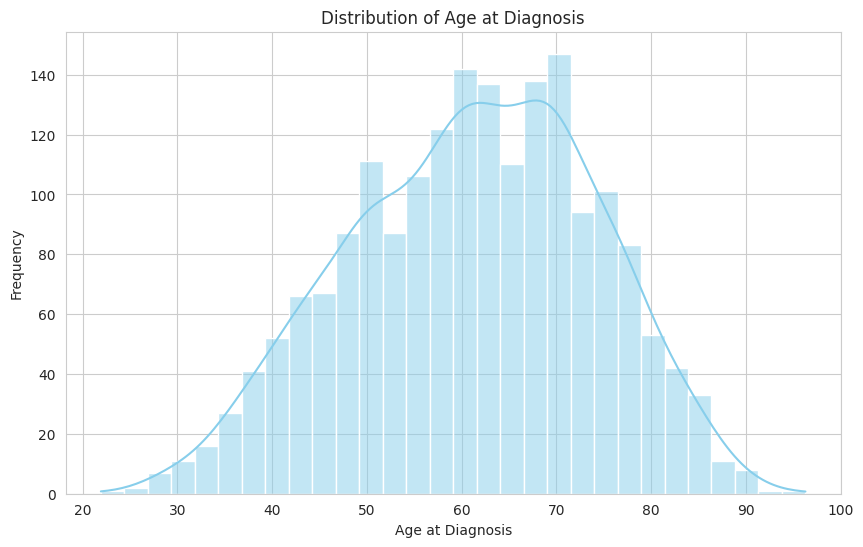

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set_style("whitegrid")

# Plotting the distribution of age_at_diagnosis
plt.figure(figsize=(10, 6))
sns.histplot(data['age_at_diagnosis'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age at Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')
plt.show()

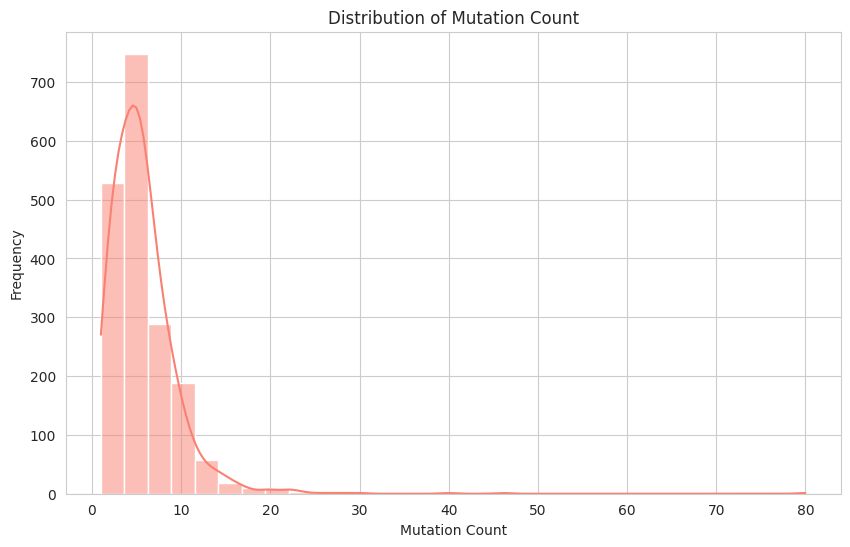

In [6]:
# Plotting the distribution of mutation_count (excluding missing values)
plt.figure(figsize=(10, 6))
sns.histplot(data['mutation_count'].dropna(), kde=True, bins=30, color='salmon')
plt.title('Distribution of Mutation Count')
plt.xlabel('Mutation Count')
plt.ylabel('Frequency')
plt.show()

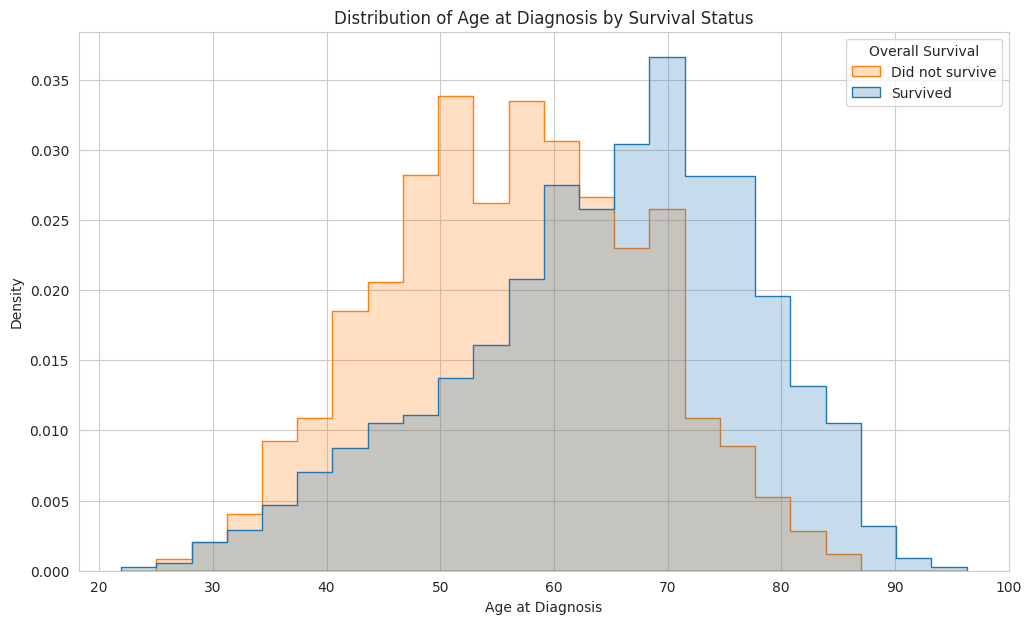

In [7]:
# Plotting the distribution of age_at_diagnosis based on overall_survival status
plt.figure(figsize=(12, 7))
sns.histplot(data, x='age_at_diagnosis', hue='overall_survival', element='step', stat="density", common_norm=False)
plt.title('Distribution of Age at Diagnosis by Survival Status')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Density')
plt.legend(title='Overall Survival', labels=['Did not survive', 'Survived'])
plt.show()

**Modify**

**Below blocks of code addresses the missing values and prepare the dataset for modeling, feature engineering, Encoding categorical variables**

In [8]:
# Imputing missing values

# For numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# For categorical columns
for col in data.select_dtypes(include=['object']).columns:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Check if there are any missing values left
missing_after_imputation = data.isnull().sum()

missing_after_imputation

patient_id                        0
age_at_diagnosis                  0
type_of_breast_surgery            0
cancer_type                       0
cancer_type_detailed              0
cellularity                       0
chemotherapy                      0
pam50_+_claudin-low_subtype       0
cohort                            0
er_status_measured_by_ihc         0
er_status                         0
neoplasm_histologic_grade         0
her2_status_measured_by_snp6      0
her2_status                       0
tumor_other_histologic_subtype    0
hormone_therapy                   0
inferred_menopausal_state         0
integrative_cluster               0
primary_tumor_laterality          0
lymph_nodes_examined_positive     0
mutation_count                    0
nottingham_prognostic_index       0
oncotree_code                     0
overall_survival_months           0
overall_survival                  0
pr_status                         0
radio_therapy                     0
dtype: int64

In [9]:
# One-Hot Encoding of categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Displaying the shape and first few rows of the encoded data
data_encoded.shape, data_encoded.head()

((1904, 58),
    patient_id  age_at_diagnosis  chemotherapy  cohort  \
 0           0             75.65             0       1   
 1           2             43.19             0       1   
 2           5             48.87             1       1   
 3           6             47.68             1       1   
 4           8             76.97             1       1   
 
    neoplasm_histologic_grade  hormone_therapy  lymph_nodes_examined_positive  \
 0                        3.0                1                             10   
 1                        3.0                1                              0   
 2                        2.0                1                              1   
 3                        2.0                1                              3   
 4                        3.0                1                              8   
 
    mutation_count  nottingham_prognostic_index  overall_survival_months  ...  \
 0             5.0                        6.044               140.50

**Model**

**Below blocks of code will: Split the data into training and testing sets. Train a machine learning model on the training data. Predict outcomes on the testing data.**

In [10]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = data_encoded.drop('overall_survival', axis=1)
y = data_encoded['overall_survival']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1523, 57), (381, 57))

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Creating a logistic regression model with standard scaling (important for logistic regression)
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))

# Training the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [12]:
# Predicting the class labels
y_pred = model.predict(X_test)

# Predicting the probabilities
y_prob = model.predict_proba(X_test)[:, 1]

y_pred[:10], y_prob[:10]  # Displaying the first 10 predictions and probabilities

(array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0]),
 array([0.32764147, 0.12036426, 0.54345581, 0.76959773, 0.39794809,
        0.25262393, 0.27244495, 0.75505388, 0.15382343, 0.22087716]))

**Assess**

**The below blocks of code will evaluate the model's performance using various metrics: Accuracy, Precision, Recall, and F1-score, ROC curve and AUC**

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1

(0.7585301837270341,
 0.6870748299319728,
 0.6870748299319728,
 0.6870748299319728)

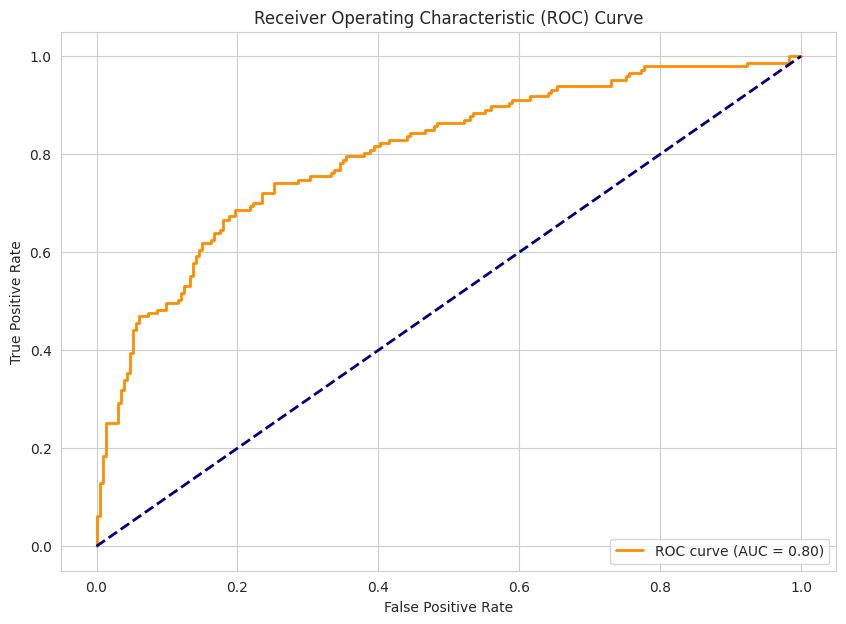

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculating the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating AUC
auc = roc_auc_score(y_test, y_prob)

# Plotting the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()